
<h2 align="center">Predict Employee Churn with Decision Trees</h2>

In [3]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [4]:
plt.rcParams['figure.figsize'] = (12,8)

In [8]:
hr=pd.read_csv(r"C:\Users\Dell\Desktop\employee_data.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
#hr.profile_report(title="hr report")

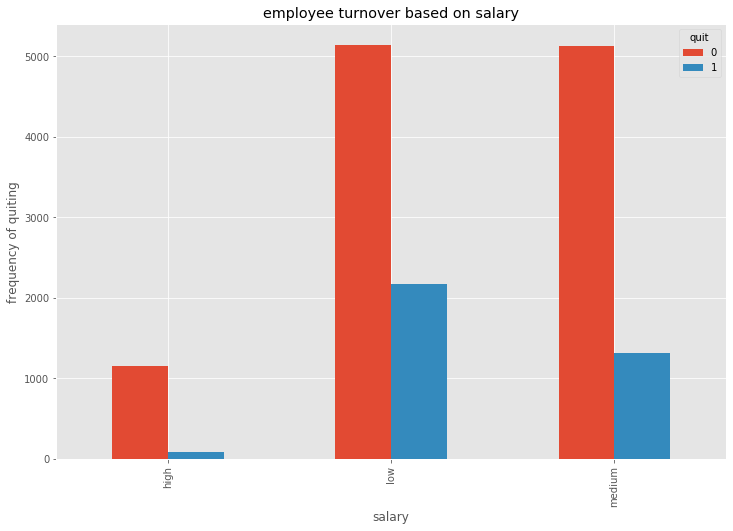

In [11]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title('employee turnover based on salary')
plt.xlabel('salary')
plt.ylabel('frequency of quiting')
plt.show()

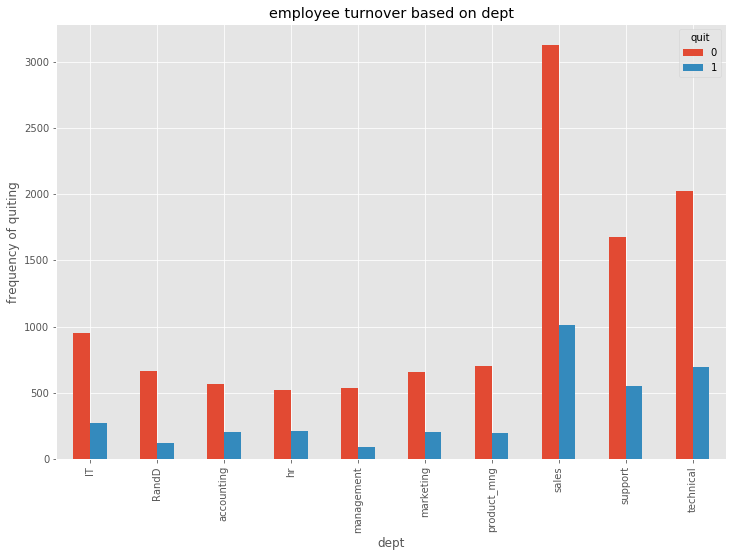

In [12]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title('employee turnover based on dept')
plt.xlabel('dept')
plt.ylabel('frequency of quiting')
plt.show()

Text(0, 0.5, 'employee quiting percentage')

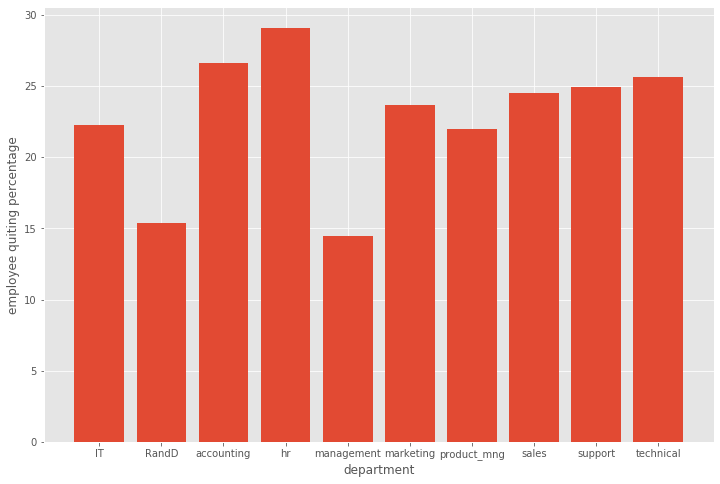

In [13]:
#hr['department'][hr['department']=='sales'].count()
#p=hr['quit'].tolist()
#p.count(0)
pop=[]
for group,frame in hr.groupby('department'):
    p=hr['quit'][hr['department']==group].tolist()
     
    #print(group+" has "+str(hr['department'][hr['department']==group].count())+" employees "+ "out of which "+str(p.count(1))+" quit")
    pop.append([group,hr['department'][hr['department']==group].count(),p.count(1)])
qperd=pd.DataFrame(pop)
qperd.columns=['dept','noofemployees','noofquit']
qperd['quiting per']=(qperd['noofquit']/qperd['noofemployees'])*100
plt.bar(qperd['dept'],qperd['quiting per'])
plt.xlabel('department')
plt.ylabel('employee quiting percentage')


In [14]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [15]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [16]:
hr.drop(columns=['department','salary'], axis=1, inplace=True)

In [17]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
x=hr.loc[:,hr.columns!='quit']
y=hr.quit

In [23]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [30]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=2,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,criterion=crit,
                                     splitter=split,max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
    estimator.fit(X_train,y_train)
    print('decision tree training accuracy:{:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('decision tree training accuracy:{:.3f}'.format(accuracy_score(y_test,estimator.predict(x_test))))
    
    #display(Image(data=graph.pipe(format='png')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…